# DIBs Detector

## Import Packages 

In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import astropy.modeling as models
import random as rd
import math
import matplotlib.patches as patches
from astropy.modeling import models, fitting
import astropy as ast
import scipy 
import matplotlib
import random

C:\Users\User\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


## Load Data 

In [8]:
hdul= fits.open('SN 2006X.fits')
hdul.info()

Filename: SN 2006X.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     964   ()      
  1  SPECTRUM      1 BinTableHDU     71   1R x 6C   [130808D, 130808E, 130808E, 130808E, 130808E, 130808E]   


## Build Detect DIBs program 

In [9]:
data = hdul[1].data

In [10]:
data['FLUX']

array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
data['WAVE']

array([[4726.85955438, 4726.87385371, 4726.88815304, ..., 6834.99738128,
        6835.01445516, 6835.03152904]])

In [12]:
# karena data FLUX berupa list dalam list, kita hilangkan dulu list yang satunya
data_flux = [item for sublist in data['FLUX'] for item in sublist]
data_wave = [item for sublist in data['WAVE'] for item in sublist]

data_fluxs = np.array(data_flux)
data_waves = np.array(data_wave)

In [13]:
data_fluxs

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [14]:
data_waves

array([4726.85955438, 4726.87385371, 4726.88815304, ..., 6834.99738128,
       6835.01445516, 6835.03152904])

In [15]:
# Finding index of waves from given ranges of waves
x1_ = 0
x2_ = np.inf
def find_axis(x1_, x2_):
    x1 = np.where(data_waves >= x1_)
    x2 = np.where(data_waves <= x2_)

    x1 = [x for xx in x1 for x in xx] 
    x2 = [x for xx in x2 for x in xx]

    x1 = x1[0]
    x2 = x2[-1]
    return(x1, x2)

In [16]:
x1,x2 = find_axis(x1_, x2_)

In [17]:
# finding minimum of fluxs value from given range of waves
xaxis = range(x1, x2)
xminfluxs = np.where(data_fluxs[xaxis] == min(data_fluxs[xaxis])) + x1
print("data flux terkecil di antara waves", data_waves[x1], "hingga",
      data_waves[x2], "ada di waves", data_waves[xminfluxs])

data flux terkecil di antara waves 4726.85955437516 hingga 6835.031529036435 ada di waves [[5922.15961942]]


## Plotting 

## Plot SN 2006X 

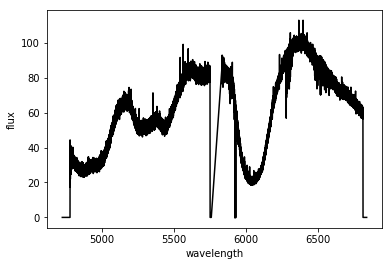

In [18]:
# plot waves vs flux from given range of waves
plt.plot(data_waves[xaxis], data_fluxs[xaxis], color='black')
#plt.title('Spectrum SN 2006X')
plt.xlabel('wavelength')
plt.ylabel('flux')
plt.savefig('SN 2006X spektrum.png')

## Plot Range 

In [19]:
def plot_range(x1_, x2_):
        x1, x2 =find_axis(x1_, x2_)
        xaxis = range(x1, x2)
        plt.plot(data_waves[xaxis], data_fluxs[xaxis],color='black')

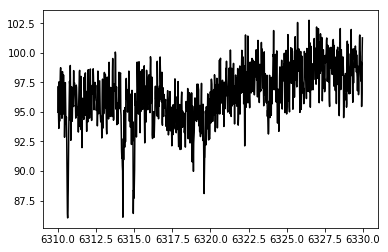

In [20]:
plot_range(6310,6330)
#DIB 6238

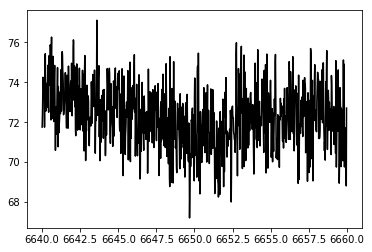

In [21]:
plot_range(6640,6660)
#DIB 6613

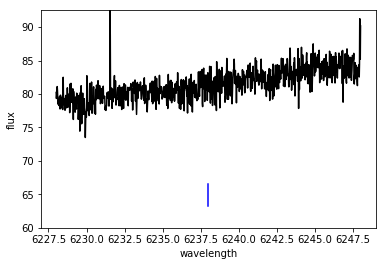

In [22]:
plot_range(6228,6248)
plt.xlabel('wavelength')
plt.ylabel('flux')
plt.ylim(60,92.5)
plt.axvline(x=6238, ymin=0.2, ymax=0.1, color='b')
#DIB 6204 (6238)

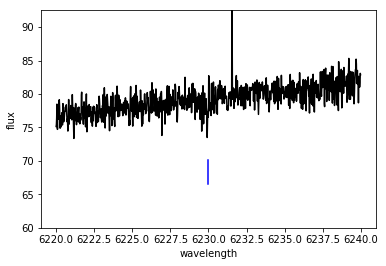

In [23]:
plot_range(6220,6240)
plt.xlabel('wavelength')
plt.ylabel('flux')
plt.ylim(60,92.5)
plt.axvline(x=6230, ymin=0.2, ymax=0.31, color='b')
#DIB 6196 (6230)

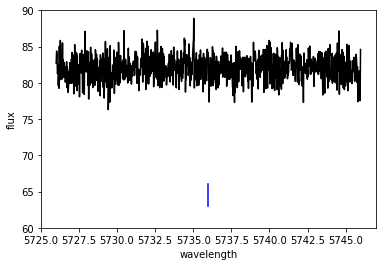

In [24]:
plot_range(5726,5746)
plt.xlabel('wavelength')
plt.ylabel('flux')
plt.ylim (60,90)
plt.axvline(x=5736, ymin=0.2, ymax=0.1, color='b')
#DIB 5705 (5736)

Text(0, 0.5, 'flux')

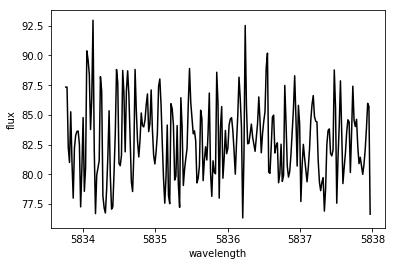

In [25]:
plot_range(5818,5838)
plt.xlabel('wavelength')
plt.ylabel('flux')
#plt.ylim (60,90)
#plt.axvline(x=5828, ymin=0.2, ymax=0.1, color='b')
#DIB 5797 (5828)

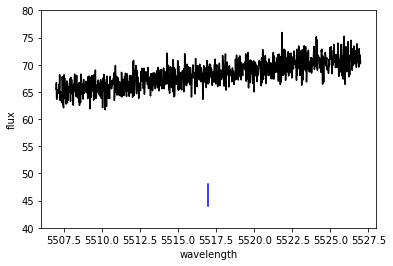

In [26]:
plot_range(5507,5527)
plt.xlabel('wavelength')
plt.ylabel('flux')
plt.ylim (40,80)
plt.axvline(x=5517, ymin=0.2, ymax=0.1, color='b')
#DIB 5487 (5517)

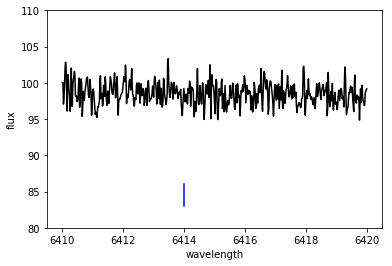

In [27]:
plot_range(6410,6420)
plt.xlabel('wavelength')
plt.ylabel('flux')
plt.ylim (80,110)
plt.axvline(x=6414, ymin=0.2, ymax=0.1, color='b')
#DIB 6379 (6414)

(20, 120)

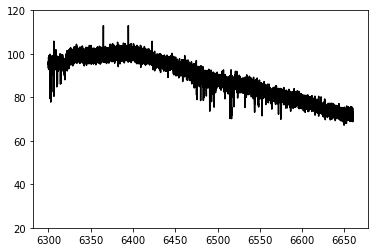

In [28]:
plot_range(6300,6660)
plt.ylim(20,120)

## Gaussian Fitting Program 

In [29]:
def plot_gauss_fit(x1_, x2_, c0=0, c1=1, 
                   x_axis = 'w', x_dib = 1, 
                   ev = False, y_axis_min_limit = 0, 
                   y_axis_max_limit = 1.2):
        
        #gaussian equation
        def gauss(x, H, A, x0, variance):
            val = H + A*np.exp(-(x - x0)**2 / (2*variance))
            return val

        #gaussian fitting
        def gauss_fit(x, y):
            baseline = sum(y) / len(x)
            mean = sum(x*y) / sum (y)  #weighted average
            amp = min(y) - baseline 
            variance = sum(y*(x - mean) ** 2) / sum(y)
            popt, pcov = curve_fit(gauss, x, y, 
                                   p0=[baseline,min(y)-baseline,mean,variance], 
                                   maxfev=5000)
            return popt
    
        #input parameter fitting
        x1, x2 = find_axis(x1_,x2_)

        #get waves and fluxs
        xaxis = range(x1, x2)
        xdata = data_waves[xaxis]
        ydata = data_fluxs[xaxis]

        #normalize the fluxs
        ydata = ydata/(xdata*c1+c0)

        if x_axis == 'r':
            xdata = (xdata - x_dib)/x_dib
            xdata = xdata*(3*10**5)        

        #gget aussian fitting parameters
        H, A, x0, variance = gauss_fit(xdata, ydata)
        FWHM = 2.35482 * np.sqrt(variance)

        #print the value of fitting parameters
        print('The offset of the gaussian baseline is', H)
        print('The center of the gaussian fit is', x0)
        print('The sigma of the gaussian fit is', np.sqrt(variance))
        print('The minimum intensity of the gaussian fit is', H + A)
        print('The Amplitude of the gaussian fit is', A)
        print('The FWHM of the gaussian fit is', FWHM)

        #plot data and gaussian fitting
        f = plt.figure()
        f.set_figwidth(8)
        f.set_figheight(5)
        plt.plot(xdata, ydata, color='black', zorder = 0)
        plt.plot(xdata, gauss(xdata, *gauss_fit(xdata, ydata)), 
                 '--r', label='fit', zorder = 5)
        if x_axis == 'r':
            plt.xlabel('Radial Velocity')
        else:
            plt.xlabel('Wavenumber')
        plt.legend()
        plt.title('Gaussian fit,  $f(x) = A e^{(-(x-x_0)^2/(2sigma^2))}$')
        plt.ylabel('Normalized Flux')

        if ev == True:
            iteration = 1000000
            area = 0
            x_min = x1_
            x_max = x2_
            if x_axis == 'r':
                x_min = (x_min - x_dib)/x_dib
                x_min = x_min*(3*10**5)
                x_max = (x_max - x_dib)/x_dib
                x_max = x_max*(3*10**5)
            diff_value = abs(x_max - x_min)
            print('x_min is ', x_min, ' | x_max is ', 
                  x_max, ' | value different is ', 
                  diff_value)
            dx = diff_value/iteration
            for i in range(iteration):
                x_gauss = x_min + (dx*i)
                y_gauss = A*math.exp((-1*(x_gauss - x0)**2)/(2*variance))
                d_area = abs(y_gauss)*dx
                area = area + d_area       
            eqivalent_width = area/H
            print('The equivalent width of the gaussian fit is ', 
                  eqivalent_width)
            x_left = x0 - (eqivalent_width/2)
            y_left = 0
            rect = patches.Rectangle((x_left, y_left), 
                                     eqivalent_width, H, 
                                     alpha = 0.3, 
                                     color = 'b', 
                                     zorder = 10) 
            plt.gca().add_patch(rect)
        plt.gca().set_ylim([y_axis_min_limit, y_axis_max_limit])
        plt.show()
        return(x0)

## Plot DIBs 6283

(70, 105)

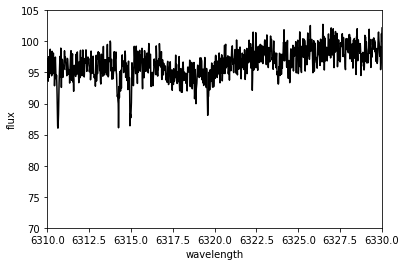

In [30]:
plt.plot(data_waves[xaxis], data_fluxs[xaxis], color='black')
#plt.title('Spectrum SN 2006X (DIBs 6283)')
plt.xlabel('wavelength')
plt.ylabel('flux')
plt.xlim(6310,6330)
plt.ylim(70,105)
#plt.axvline(x=6318.852344903369, ymin=0.2, ymax=0.1, color='b')

## Normalisasi 

In [31]:
p1 = models.Polynomial1D(3)
p1.c0 = 1
p1.c1 = 2

In [32]:
p2 = models.Polynomial1D(2)
pfit = fitting.LinearLSQFitter()
x1_6283, x2_6283 = find_axis(6310, 6330)
xaxis_1 = range(x1_6283, x2_6283)
xx = data_waves[xaxis_1]
yy = data_fluxs[xaxis_1]
#3 yy = np.array([yy, yy])
new_model = pfit(p2, xx, yy)
new_model

 [astropy.modeling.fitting]


<Polynomial1D(2, c0=-1202.72315897, c1=0.20558588, c2=0.)>

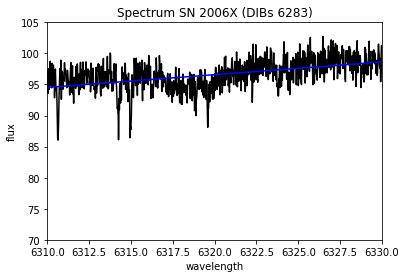

In [33]:
plt.plot(data_waves[xaxis_1], data_fluxs[xaxis_1], color='black')
plt.title('Spectrum SN 2006X (DIBs 6283)')
plt.xlabel('wavelength')
plt.ylabel('flux')
plt.xlim(6310, 6330)
plt.ylim (70,105)
plt.plot(xx, (xx*0.20558588-1202.72315897), c = 'b')

(0.8, 1.1)

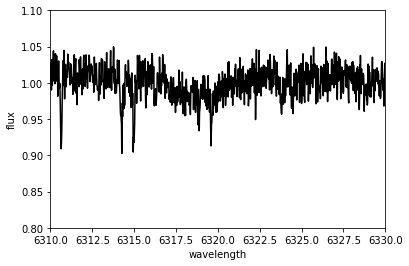

In [34]:
plt.plot(xx, yy/(xx*0.20558588-1202.72315897), c = 'black')
#plt.title('Spectrum SN 2006X (DIBs 6283)')
plt.xlabel('wavelength')
plt.ylabel('flux')
plt.xlim(6310,6330)
plt.ylim(0.8,1.1)

## Gaussian Fitting 

## dalam wavelength 

The offset of the gaussian baseline is 1.0042146191843722
The center of the gaussian fit is 6318.85230997587
The sigma of the gaussian fit is 1.238750870718405
The minimum intensity of the gaussian fit is 0.9771072683136407
The Amplitude of the gaussian fit is -0.027107350870731434
The FWHM of the gaussian fit is 2.9170353253851147


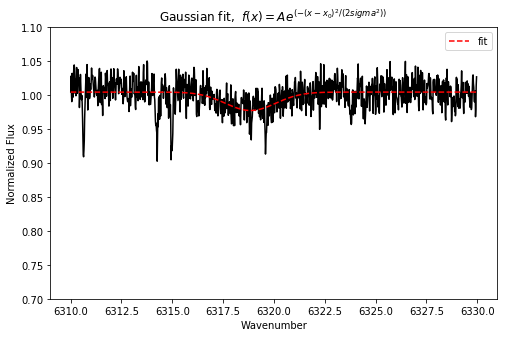

<Figure size 432x288 with 0 Axes>

In [35]:
plot_gauss_fit(6310,6330, c0=-1202.72315897, c1=0.20558588, x_axis='w', x_dib=6283.84, ev = False, y_axis_min_limit=0.7, y_axis_max_limit=1.1)
plt.savefig('SN 2006X spektrum (DIB 6283 w.png')

## dalam radial velocity 

The offset of the gaussian baseline is 1.004214619069503
The center of the gaussian fit is 1671.5404889889378
The sigma of the gaussian fit is 59.139822988574636
The minimum intensity of the gaussian fit is 0.9771072634033567
The Amplitude of the gaussian fit is -0.027107355666146166
The FWHM of the gaussian fit is 139.26363796995534


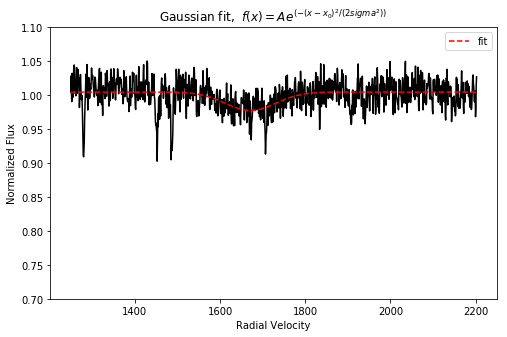

1671.5404889889378

In [36]:
plot_gauss_fit(6310,6330, c0=-1202.72315897, c1=0.20558588, x_axis='r', x_dib=6283.84, ev = False, y_axis_min_limit=0.7, y_axis_max_limit=1.1)

## Menghitung equivalent width 

The offset of the gaussian baseline is 1.0042146191843722
The center of the gaussian fit is 6318.85230997587
The sigma of the gaussian fit is 1.238750870718405
The minimum intensity of the gaussian fit is 0.9771072683136407
The Amplitude of the gaussian fit is -0.027107350870731434
The FWHM of the gaussian fit is 2.9170353253851147
x_min is  6310  | x_max is  6330  | value different is  20
The equivalent width of the gaussian fit is  0.08381745012231073


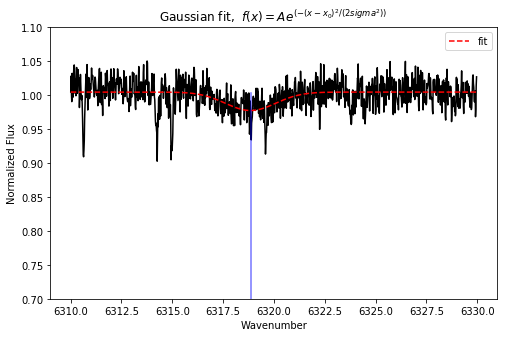

6318.85230997587

In [37]:
plot_gauss_fit(6310,6330, c0=-1202.72315897, c1=0.20558588, x_axis='w', x_dib=6283.84, ev = True, y_axis_min_limit=0.7, y_axis_max_limit=1.1)

## Plot DIBs 6613 

(68, 76)

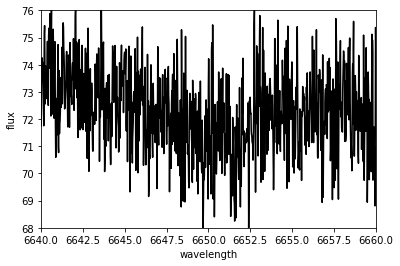

In [38]:
plt.plot(data_waves[xaxis], data_fluxs[xaxis], color='black')
#plt.title('Spectrum SN 2006X (DIBs 6613)')
plt.xlabel('wavelength')
plt.ylabel('flux')
plt.xlim(6640,6660)
plt.ylim(68,76)
#plt.axvline(x=6649.8586977693185, ymin=0.2, ymax=0.1, color='b')

## Normalisasi 

In [39]:
p1 = models.Polynomial1D(3)
p1.c0 = 1
p1.c1 = 2

In [40]:
p2 = models.Polynomial1D(2)
pfit = fitting.LinearLSQFitter()
x1_6613, x2_6613 = find_axis(6640, 6660)
xaxis_2 = range(x1_6613, x2_6613)
xx = data_waves[xaxis_2]
yy = data_fluxs[xaxis_2]
#3 yy = np.array([yy, yy])
new_model = pfit(p2, xx, yy)
new_model

<Polynomial1D(2, c0=436.06544453, c1=-0.05470011, c2=-0.)>

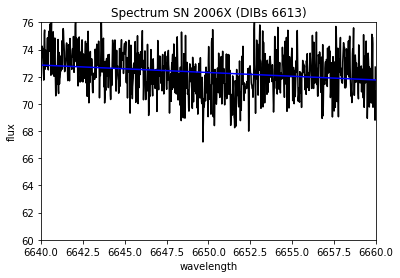

In [41]:
plt.plot(data_waves[xaxis_2], data_fluxs[xaxis_2], color='black')
plt.title('Spectrum SN 2006X (DIBs 6613)')
plt.xlabel('wavelength')
plt.ylabel('flux')
plt.xlim(6640, 6660)
plt.ylim (60,76)
plt.plot(xx, (xx*-0.05470011+436.06544453), c = 'b')

(6640, 6660)

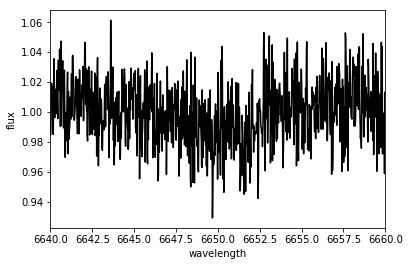

In [42]:
plt.plot(xx, yy/(xx*-0.05470011+436.06544453), c = 'black')
#plt.title('Spectrum SN 2006X (DIBs 6613)')
plt.xlabel('wavelength')
plt.ylabel('flux')
plt.xlim(6640,6660)
#plt.ylim(0.8,1.1)

## Gaussian Fitting 

## dalam wavelength 

The offset of the gaussian baseline is 1.0069189291237322
The center of the gaussian fit is 6649.858762532757
The sigma of the gaussian fit is 2.7563008326110237
The minimum intensity of the gaussian fit is 0.9869088709208054
The Amplitude of the gaussian fit is -0.02001005820292681
The FWHM of the gaussian fit is 6.490592326649091


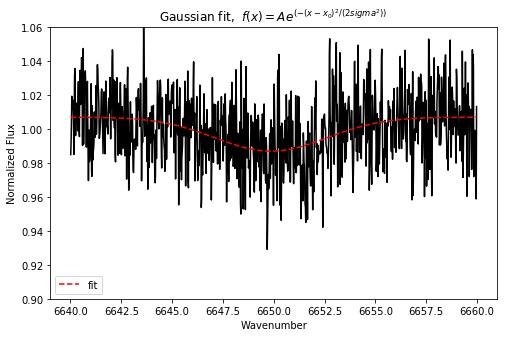

6649.858762532757

In [43]:
plot_gauss_fit(6640,6660, c0=436.06544453, c1=-0.05470011, x_axis='w', x_dib=6613.6, ev = False, y_axis_min_limit=0.9, y_axis_max_limit=1.06)

## dalam radial velocity 

The offset of the gaussian baseline is 1.006918930021889
The center of the gaussian fit is 1644.7364132344098
The sigma of the gaussian fit is 125.02879350952449
The minimum intensity of the gaussian fit is 0.9869088735348401
The Amplitude of the gaussian fit is -0.020010056487048896
The FWHM of the gaussian fit is 294.4203035320985


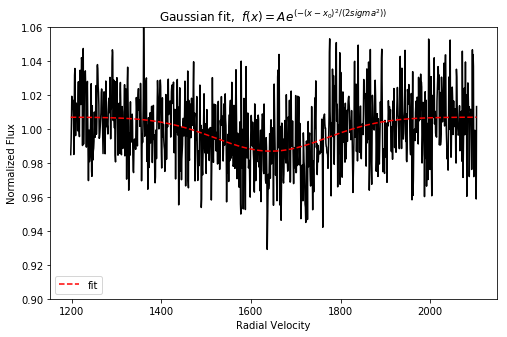

1644.7364132344098

In [44]:
plot_gauss_fit(6640,6660, c0=436.06544453, c1=-0.05470011, x_axis='r', x_dib=6613.6, ev = False, y_axis_min_limit=0.9, y_axis_max_limit=1.06)

## Menghitung Equivalent Width 

The offset of the gaussian baseline is 1.0069189291237322
The center of the gaussian fit is 6649.858762532757
The sigma of the gaussian fit is 2.7563008326110237
The minimum intensity of the gaussian fit is 0.9869088709208054
The Amplitude of the gaussian fit is -0.02001005820292681
The FWHM of the gaussian fit is 6.490592326649091
x_min is  6640  | x_max is  6660  | value different is  20
The equivalent width of the gaussian fit is  0.13726002241291216


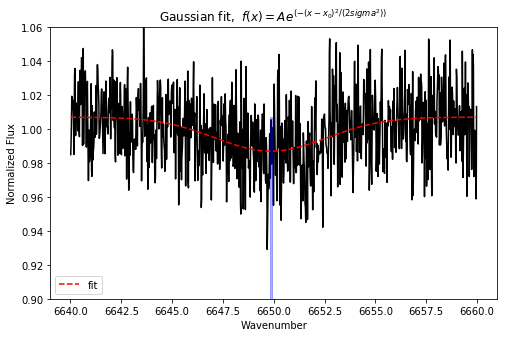

6649.858762532757

In [45]:
plot_gauss_fit(6640,6660, c0=436.06544453, c1=-0.05470011, x_axis='w', x_dib=6613.6, ev = True, y_axis_min_limit=0.9, y_axis_max_limit=1.06)